# Telco Churn Classification Project

# Goals:
### - Discover drivers for customer churn at Telco.
### - Use drivers to develop a machine learning model to predict customer churn.
### - Use the model for recommendations on ways to reduce churn

## Imports

In [1]:
# imports 
import pandas as pd
import numpy as np
from pydataset import data

#stats
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

import scipy as sp
from pydataset import data
from env import user, password, host

import warnings
warnings.filterwarnings("ignore")

import wrangle as w
import os
directory = os.getcwd()
seed = 3333

## Acquire
### - Data acquired from the CodeUp mySQL server, the Telco database was gathered during the Tobias cohort.
### - Original size of data (7043 rows, 24 columns) 
### - Each row represents a Telco customer
### - Each column represents a feature for each Telco customer

## Prepare

#### Prepare Actions:

- Removed columns that where duplicates or not useful
- Renamed columns to promote readability
- Checked for nulls in the data (there were none)
- Checked that column data types were appropriate
- Removed white space from values in object columns
- Added column 'ave_tenure_charges' indicating the average cahrge per tenure unit
- Encoded categorical variables
- Split data into train, validate and test (approx. 60/20/20), stratifying on 'chhurn_encoded'
- Scaled continuous variables
- Outliers have been removed for this iteration of the project

# Data Dictionary

| Feature | Definition |
|:--------|:-----------|
|senior_citizen             |customer is a senior citizen|
|tenure                     |months in the company|
|monthly_charges            |monthly bill|
|total_charges              |toal charges on all bills|
|avg_tenure_charges         |total charges divided by tenure|
|gender_encoded             |gender of customer|
|partner_encoded            |has a partner|
|dependents_encoded         |does the customer have dependents|
|phone_service_encoded      |does the customer have phone service?|
|paperless_billing_encoded  |paperless billing|
|churn_encoded              |did the customer churn from the company?|
|multiple_lines_No phone service      |no multiple phone lines|
|multiple_lines_Yes                   |yes multiple phone lines|
|online_security_No internet service  |no internet security service|
|online_security_Yes                  |yes internet secutiry services|
|online_backup_No internet service    |no internet service online backup|
|online_backup_Yes                    |yes internet service online backup|
|device_protection_No internet service|no internet device protection|
|device_protection_Yes                |no internet device protection|
|tech_support_No internet service     |no tech support having no internet service|
|tech_support_Yes                     |yes tech support having no internet service|
|streaming_tv_No internet service     |no streaming tv or internet service|
|streaming_tv_Yes                     |yes streaming tv|
|streaming_movies_No internet service |no streaming m,ovies or internet|
|streaming_movies_Yes                 |yes streaming movies|
|contract_type_One year               |one year contract|
|contract_type_Two year               |two year contract|
|internet_service_type_Fiber optic    |fiber optic internet service|
|internet_service_type_None           |no internet service|
|payment_type_Credit card (automatic) |paying with credit card|
|payment_type_Electronic check        |paying with electronic check|
|payment_type_Mailed check            |paying with mailed check|

In [2]:
# acquiring, cleaning, and adding features to data
telco = w.get_telco_data()

# splitting data into train, validate, and test
train, val, test = w.split_data_telco(telco)

# adding scaled columns
train_prepped, val_prepped, test_prepped = w.prep_telco_data(telco)

## A brief look at the data

In [3]:
# a sample of data ill be working with
train_prepped.head()

,senior_citizen,tenure,monthly_charges,total_charges,avg_tenure_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
4442,0,1,62.80,62.80,62.80,0,0,0,1,1,...,1,0,1,0,0,0,0,0,0,1
4865,0,67,24.65,1620.45,24.19,0,1,1,1,0,...,0,1,0,0,1,0,1,0,0,0
1304,0,56,89.70,4952.95,88.45,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
4869,1,9,74.05,678.45,75.38,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,0
531,1,9,100.50,918.60,102.07,0,0,0,1,1,...,1,0,1,0,0,1,0,0,1,0


In [4]:
# column descriptors
train_prepped.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,4218.0,0.167615,0.373568,0.00,0.0000,0.00,0.000,1.00
tenure,4218.0,32.435752,24.538322,1.00,9.0000,29.00,55.000,72.00
monthly_charges,4218.0,64.882563,29.968126,18.25,36.1750,70.35,89.700,118.65
total_charges,4218.0,2286.271337,2265.854662,18.80,395.7250,1402.25,3808.150,8670.10
avg_tenure_charges,4218.0,64.843198,30.063720,13.83,37.1275,70.43,89.885,120.75
gender_encoded,4218.0,0.493125,0.500012,0.00,0.0000,0.00,1.000,1.00
partner_encoded,4218.0,0.491702,0.499990,0.00,0.0000,0.00,1.000,1.00
dependents_encoded,4218.0,0.296586,0.456807,0.00,0.0000,0.00,1.000,1.00
phone_service_encoded,4218.0,0.903272,0.295622,0.00,1.0000,1.00,1.000,1.00
paperless_billing_encoded,4218.0,0.592224,0.491479,0.00,0.0000,1.00,1.000,1.00


## Explore

* How often do upsets occur?
* Question: does senior citizen affect churn?
* Does churn depend on internet_service_type_None?
* Does churn depend on customers paying with credit card (payment_type_Credit card (automatic))?

## How often does churn occur?

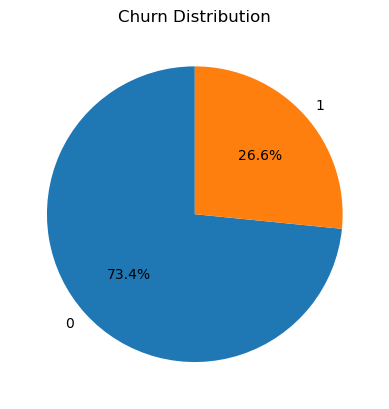

In [5]:
# Get value counts with normalization
churn_counts = train_prepped.churn_encoded.value_counts(normalize=True)
# Plot
churn_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Churn Distribution')
plt.ylabel('')  # This is to remove the column name from the y-axis label
plt.show()

- customer churn 26%

## Do senior_citizen churn more than the rest?

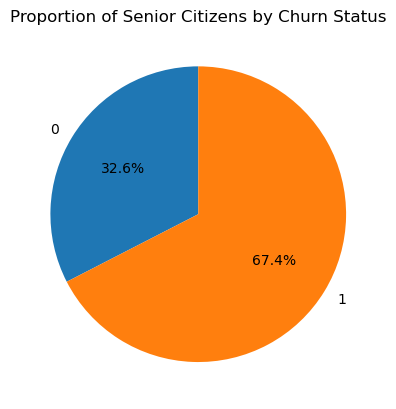

In [6]:
# Group by 'churn_encoded' and get the mean of 'senior_citizen'
grouped_data = train_prepped.groupby('churn_encoded')['senior_citizen'].mean()

# Plot the pie chart
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Senior Citizens by Churn Status')
plt.ylabel('')  # This is to remove the column name from the y-axis label
plt.show()

### Using chi^2 i will investigate wether churn and senior_citizen are realted
#### $H_0$: churn is independent of senior_citizen

#### $H_a$: churn is dependent of senior_citizen

- alpha = 0.05

In [7]:
# performing chi2 to find p
observed_senior = pd.crosstab(train_prepped.churn_encoded, train_prepped.senior_citizen)
chi2, p, degf, expected = stats.chi2_contingency(observed_senior)
p

1.0802577442163837e-26

### The p-value is less than alpha, therefore, we reject the null hypothesis
### - churn is dependent on senior_citizen

## Does churn depend on internet_service_type_None?

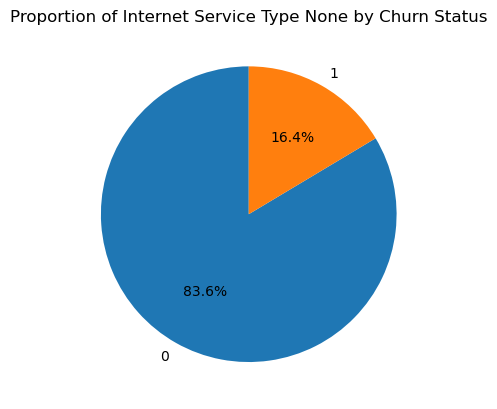

In [8]:
# Group by 'churn_encoded' and get the mean of 'internet_service_type_None'
grouped_data = train_prepped.groupby('churn_encoded')['internet_service_type_None'].mean()

# Plot the pie chart
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Internet Service Type None by Churn Status')
plt.ylabel('')  # This is to remove the column name from the y-axis label
plt.show()

### Using the chi^2 to investigate wether churn and no internet service are related
#### $H_0$: churn is independent of no internet service

#### $H_a$: churn is dependent of no internet service

- alpha = 0.05

In [9]:
# performing chi2 to find p
observed_no_internet = pd.crosstab(train_prepped.churn_encoded, train_prepped.internet_service_type_None)
chi2, p, degf, expected = stats.chi2_contingency(observed_no_internet)
p

1.2372849512966904e-52

### The p-value is less than alpha, therefore, we reject the null hypothesis
#### churn is dependent on no internet service

## Does churn depend on customers paying with credit card (payment_type_Credit card (automatic))?

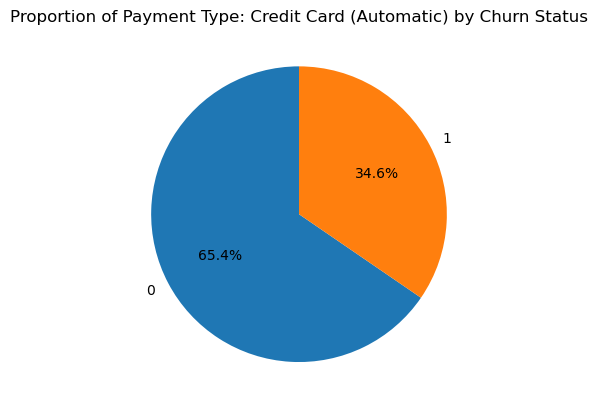

In [10]:
# Group by 'churn_encoded' and get the mean of 'payment_type_Credit card (automatic)'
grouped_data = train_prepped.groupby('churn_encoded')['payment_type_Credit card (automatic)'].mean()

# Plot the pie chart
grouped_data.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Payment Type: Credit Card (Automatic) by Churn Status')
plt.ylabel('')  # This is to remove the column name from the y-axis label
plt.show()

## Using chi^2 to investigate wether churn and paying with credit card are related
#### $H_0$: churn is independent of customers who pay with credit card

#### $H_a$: churn is dependent of customers who pay with credit card

- alpha = 0.05

In [11]:
# performing chi2 to find p
observed_credit_card = pd.crosstab(train_prepped.churn_encoded, train_prepped['payment_type_Credit card (automatic)'])
chi2, p, degf, expected = stats.chi2_contingency(observed_credit_card)
p

5.034379872806276e-16

### The p-value is less than alpha, therefore, we reject the null hypothesis
#### churn is dependent on customers paying with credit card

# Exploration Summary
 
* There IS a relationship between churn and whether they are or not senior citizen.
* There IS a relationship between churn and not having internet service.
* There IS a relationship between churn and customers who pay with credit card.

# Features I am moving to modeling With

* Those specific 3 features, as a group and on their own
* ALL features

# Modeling

### I will use accuracy as my evaluation metric

In [12]:
# for preprocessed features:
hunch_features = ['senior_citizen', 'internet_service_type_None', 'payment_type_Credit card (automatic)']

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [13]:
# Separate out our X and y values
X_train = train_prepped.drop(columns=["churn_encoded"])
y_train = train_prepped.churn_encoded

X_validate = val_prepped.drop(columns=["churn_encoded"])
y_validate = val_prepped.churn_encoded

X_test = test_prepped.drop(columns=["churn_encoded"])
y_test = test_prepped.churn_encoded

# setting parameters 
baseline_accuracy = (train_prepped.churn_encoded == 0).mean()

## Logistic Regression

In [14]:
# Create the logistic regression
logit1 = LogisticRegression(random_state=123, C=1)

# specify the features we're using
features = ['senior_citizen', 'internet_service_type_None', 'payment_type_Credit card (automatic)']

# Fit a model using only these specified features
logit1.fit(X_train[features], y_train)

y_pred = logit1.predict(X_train[features])

print("Logistic Regression using senior citizen, internet_service)type_None, and payment_type_Credit card (automatic)")
print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit1.score(X_train[features], y_train)))

Logistic Regression using senior citizen, internet_service)type_None, and payment_type_Credit card (automatic)
Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.73


In [15]:
# All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123, C=0.01)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print("Baseline is", round(baseline_accuracy, 2))
print('Accuracy of Logistic Regression classifier on training set: {:.4f}'
     .format(logit2.score(X_train, y_train)))

Model trained on all features
Baseline is 0.73
Accuracy of Logistic Regression classifier on training set: 0.8054


In [16]:
# Logit2 uses all features
y_pred = logit2.predict(X_validate)

print("Logit2 model using all features and all model defaults when C = 0.01")
print("Baseline is", round(baseline_accuracy, 2))
print(classification_report(y_validate, y_pred))

Logit2 model using all features and all model defaults when C = 0.01
Baseline is 0.73
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.74      1407
weighted avg       0.80      0.81      0.80      1407



## Takeaway:
### the best validate results are from `logit2` where c = 0.01 with the accuracy of 0.8081 and precision of 0.84 (Baseline accuracy = 0.73 accuracy of Logistic Regression classifier on training set = 0.8054 (very little change))

## Random Forest 

In [17]:
# Make the model
forest1 = RandomForestClassifier(max_depth=8, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Max depth of 8 depth")
pd.DataFrame(report)

Max depth of 8 depth


,0,1,accuracy,macro avg,weighted avg
precision,0.853673,0.775281,0.838786,0.814477,0.832839
recall,0.941879,0.553970,0.838786,0.747924,0.838786
f1-score,0.895609,0.646202,0.838786,0.770906,0.829325
support,3097.000000,1121.000000,0.838786,4218.000000,4218.000000


In [18]:
# Comparing train and validate along with their differences with various max_depths
metrics = []

for i in range(2, 25):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "max_depth": i,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df.head(7)

,max_depth,train_accuracy,validate_accuracy,difference
0,2,0.758653,0.756930,0.001724
1,3,0.787340,0.791045,-0.003705
2,4,0.792319,0.788913,0.003406
3,5,0.798483,0.790334,0.008149
4,6,0.809862,0.796731,0.013132
5,7,0.821716,0.800284,0.021432
6,8,0.838786,0.801706,0.037080


## Takeaways:

### On the random forest model, the best results are from max depth = 8, with train accuracy= 0.819820 validate accuracy= 0.805970 (difference=0.013850)

## Decision Tree

In [19]:
# creating a mode using logistic regresion
logreg_1 = LogisticRegression(penalty='l2', C=1)
# fit it into the model
logreg_1.fit(X_train[hunch_features], y_train)
# now I predict
logreg_1.predict(X_train[hunch_features])
y_pred = logreg_1.predict(X_train[hunch_features])
features = X_train.columns.to_list()

In [20]:
# decision tree classifier:
clf_0 = DecisionTreeClassifier(max_depth=3)
# fit the thing:
clf_0.fit(X_train, y_train)
# use the thing
max_d_5 = clf_0.predict(X_train)
print(export_text(
clf_0,
feature_names=features))

|--- internet_service_type_Fiber optic <= 0.50
|   |--- tenure <= 9.50
|   |   |--- online_security_No internet service <= 0.50
|   |   |   |--- class: 0
|   |   |--- online_security_No internet service >  0.50
|   |   |   |--- class: 0
|   |--- tenure >  9.50
|   |   |--- contract_type_Two year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_Two year >  0.50
|   |   |   |--- class: 0
|--- internet_service_type_Fiber optic >  0.50
|   |--- tenure <= 21.50
|   |   |--- total_charges <= 95.72
|   |   |   |--- class: 1
|   |   |--- total_charges >  95.72
|   |   |   |--- class: 1
|   |--- tenure >  21.50
|   |   |--- contract_type_Two year <= 0.50
|   |   |   |--- class: 0
|   |   |--- contract_type_Two year >  0.50
|   |   |   |--- class: 0



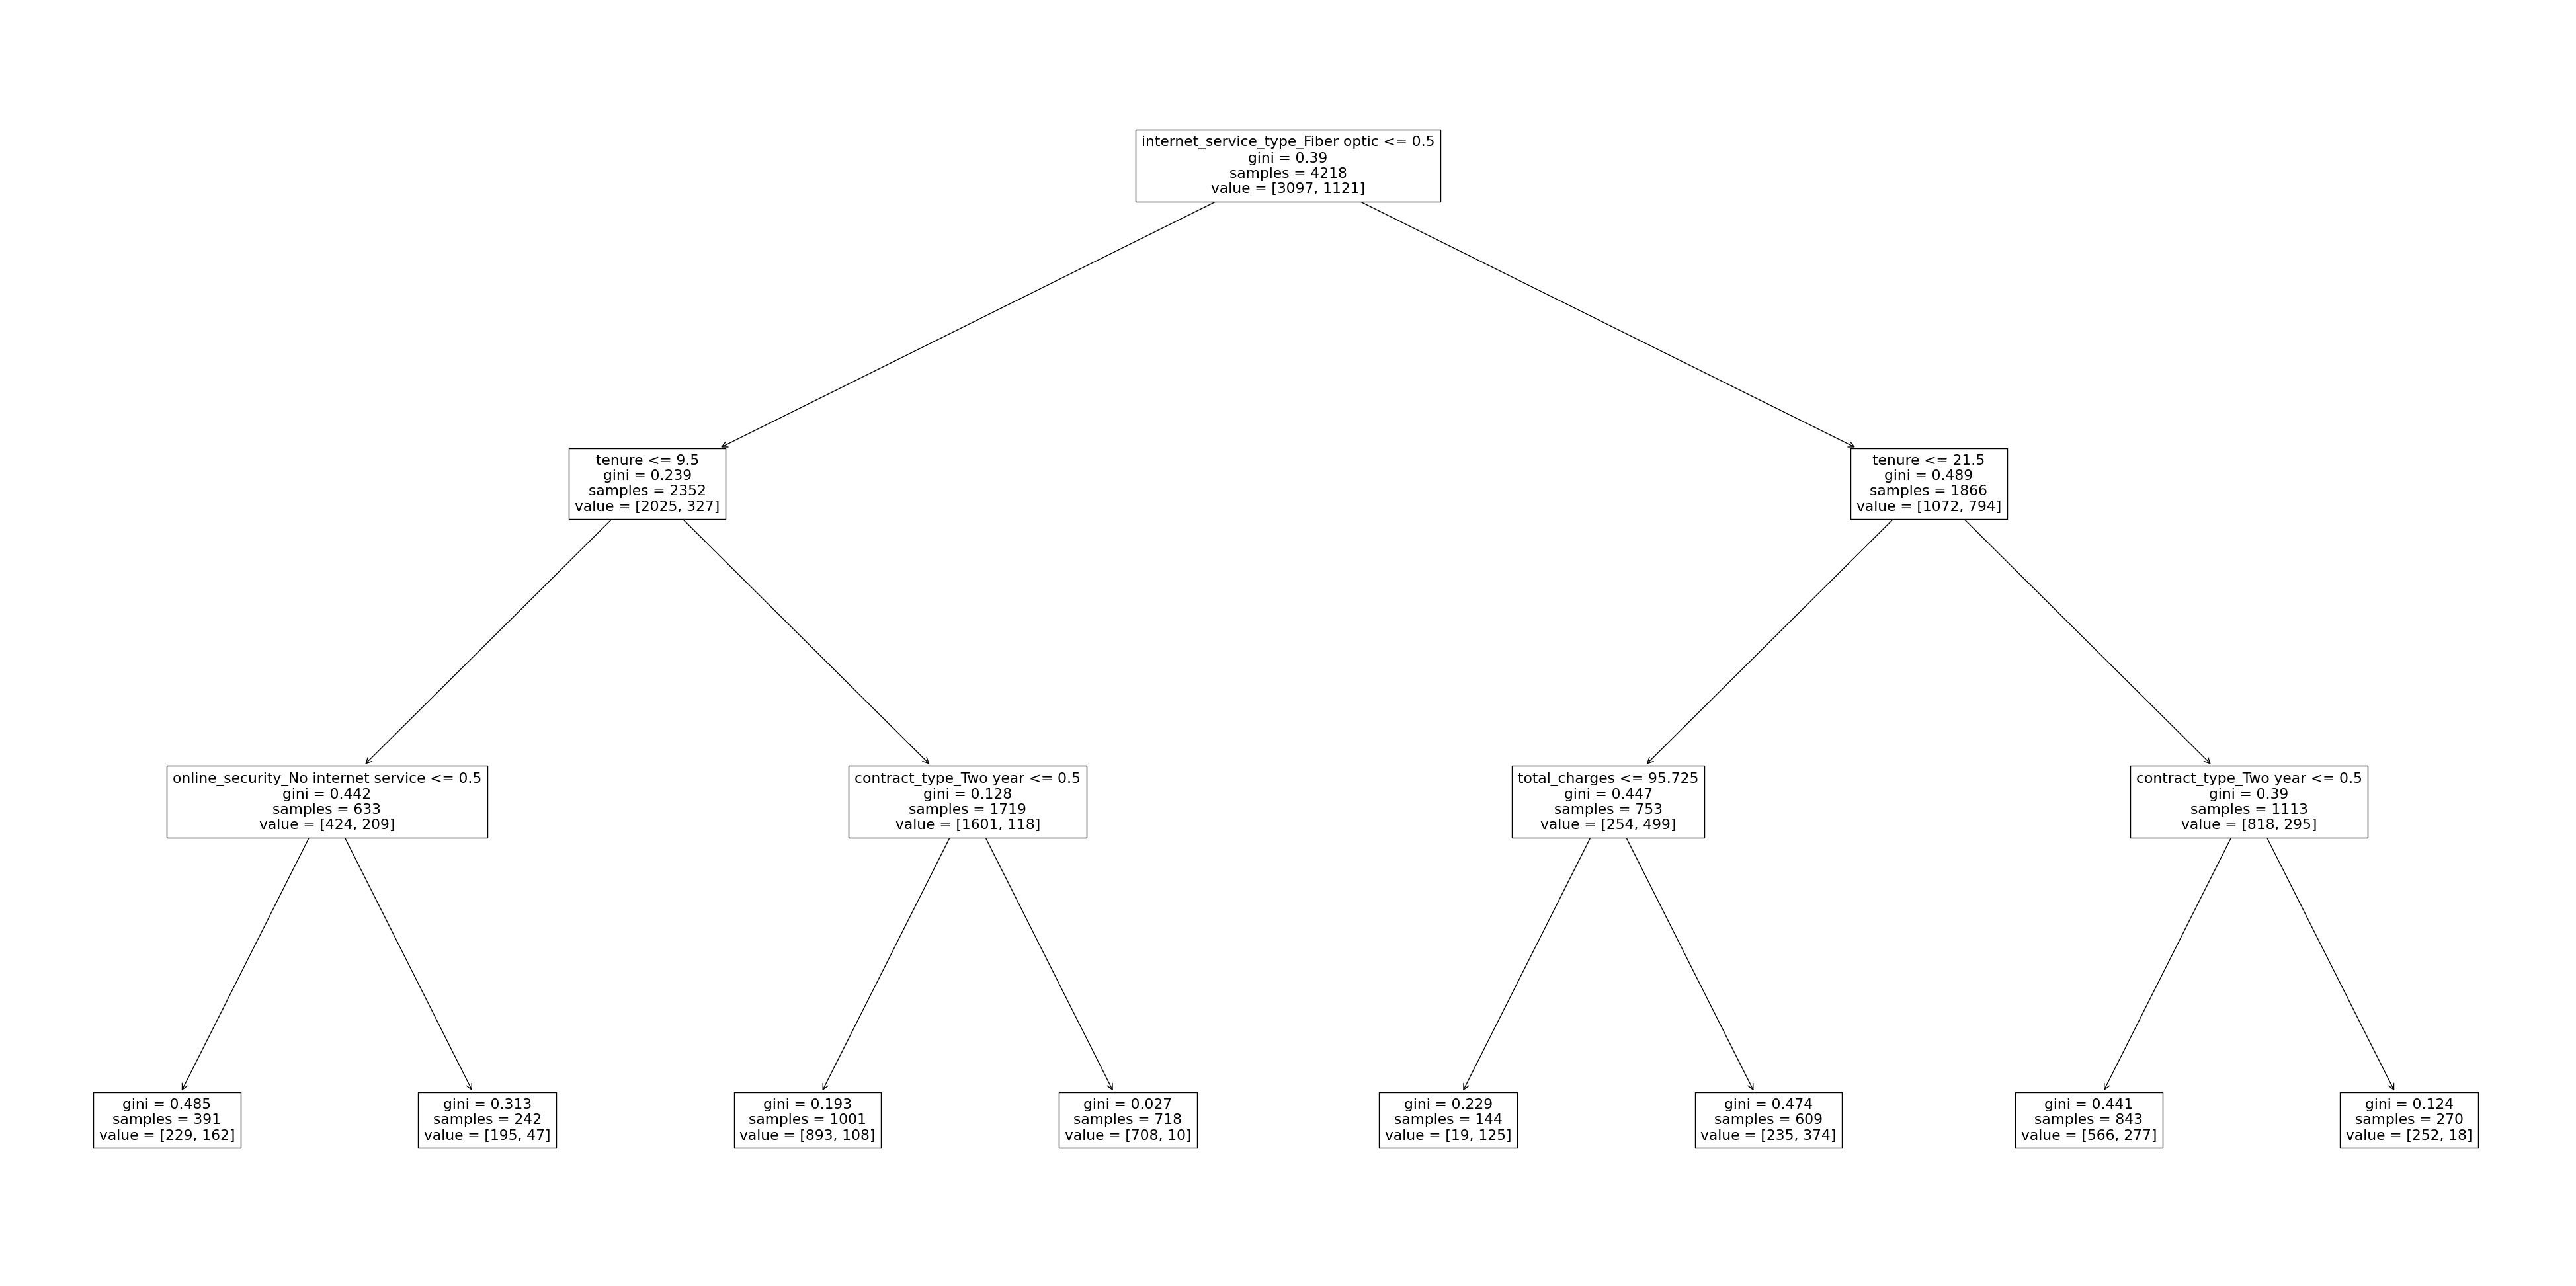

In [21]:
# Decision tree figure that visually explains how the model worked after it calculations
plt.figure(figsize=(50,25))
plot_tree(clf_0,
         feature_names=features)
plt.show()

In [22]:
# creating a list to run the desicion tree with multiple depths
scores_all = []

for x in range(1,20):

    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    train_acc = clf.score(X_train, y_train)
    
    #evaluate on validate
    val_acc = clf.score(X_validate, y_validate)
    
    scores_all.append([x, train_acc, val_acc])

In [23]:
# outpiting the train, validate, and its difference with the various depths
scores_df = pd.DataFrame(scores_all, columns=['max_depth','train_acc','val_acc'])
scores_df['diff'] = scores_df.train_acc - scores_df.val_acc
scores_df.sort_values('diff').head(5)

,max_depth,train_acc,val_acc,diff
0,1,0.734234,0.734186,0.000048
1,2,0.792319,0.785359,0.006960
2,3,0.792319,0.785359,0.006960
3,4,0.792319,0.785359,0.006960
4,5,0.801565,0.791756,0.009809


## Takeaways:

### on the decision tree model, max depth 5 is the best with train accuracy: 0.801565 val_accuracy: 0.792466 diff:0.009098

# Comparing Modeling conclusion:
- For the **Logistic Regression** classifier model, the best results are from logit2 where c = 0.01 with the accuracy of 0.8081 and precision of 0.84 (Baseline accuracy = 0.73 accuracy on training set = 0.8054 (difference=0.0027))
- For the decision tree model, max depth 5 is the best with train accuracy: 0.801565 val_accuracy: 0.791756 (difference=0.009809)
- For the random forest model, the best results are from max depth = 8, with train accuracy= 0.819820 validate accuracy= 0.805970 (difference=0.013850)

## Logistic Regression on Test
### Logit2 model using all features and all model defaults when C = 0.01
### Baseline is 0.7342
### Test accuracy for Logit2 model: 0.7967
### An improvement of **6.25%**

In [24]:
# for my logit2 I fed in all features and do not need to narrow down my feature space.
X_test = test_prepped.drop(columns='churn_encoded')
y_test = test_prepped['churn_encoded']
# Logit2 uses all features
test_pred = logit2.predict(X_test)

print("Logit2 model using all features and all model defaults when C = 0.01")
print("Baseline is", round(baseline_accuracy, 4))
test_accuracy = logit2.score(X_test, y_test)
print("Test accuracy for Logit2 model:", round(test_accuracy, 4))
print(f'An improvement of {round(test_accuracy, 4)-round(baseline_accuracy, 4)}')


Logit2 model using all features and all model defaults when C = 0.01
Baseline is 0.7342
Test accuracy for Logit2 model: 0.7967
An improvement of 0.0625


## Modeling Summery
* Decision Tree, Random Forest, and Logistic Regression models all performed about equal to each other and better than the baseline accuracy.
* The decision tree model performed slightly better on train data but was worse on validate data. It is likely overfit.
* A Logistic Regression model selected as the final model and had an accuracy of about 80% which is higher than the baseline accuracy

## Conclusion
### Exploration
 
* There IS a relationship between churn and whether they are or not senior citizen.
* There IS a relationship between churn and not having internet service.
* There IS a relationship between churn and customers who pay with credit card.

### Modeling
#### **The final model increased the accuracy of predicting Telco customers who would churn by 6.25%.**

* In this case, I want to know what features are most dependable for figuring out what led to churn in Telco.  I have made a lot of progress in this regard but I certainly still have directions to run.- Consider offering longer service plans/contracts at a marginally higher fixed price to avoid customer churn.
- Consider offering a promotion to those customers who pay with credit card.

# Recommendations:
#### - **Consider offering longer service plans/contracts at a marginally higher fixed price to avoid customer churn.**
#### - **Consider offering a promotion to those customers who pay with credit card.**

#### Next Steps
* In the next run-through i would like to explore the 'contract-type' and associate it to the 'monthly-charges' to see the price change as a factor to customer churn.
* Perhaps scale the 3 features containing continious data.